In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
# Pip install method

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 26.3/166.8 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="AXtvn8E5cqIPHd94QNpU")
project = rf.workspace("university-college-london-pmvix").project("nrmm")
dataset = project.version(10).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.5 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=42671e8b72ba4c11838f0ee64afa384fc509ad82a26b8dcee056109ea36f5e41
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: idna
    Found e

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`


Extracting Dataset Version Zip to -NRMM-10 in yolov8:: 100%|██████████| 8659/8659 [00:02<00:00, 4260.98it/s]


##1. Upsampling Layer

In [5]:
from google.colab import drive
drive.mount('/content/drive')
import os

Mounted at /content/drive


In [5]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

####A. UPSAMPLE the raw data by factor 2

In [6]:
from ultralytics import YOLO

# Load a model
model = YOLO("/content/yolov8_up1.yaml")  # build a new model from scratch

# Use the model
model.train(data="/content/-NRMM-10/data.yaml", epochs=50, imgsz=640)  # train the model
metrics = model.val()  # evaluate model performance on the validation set


                   from  n    params  module                                       arguments                     
  0                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
  1                  -1  1       928  ultralytics.nn.modules.Conv                  [3, 32, 3, 2]                 
  2                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  3                  -1  1     29056  ultralytics.nn.modules.C2f                   [64, 64, 1, True]             
  4                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  5                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  6                  -1  1    295424  ultralytics.nn.modules.Conv                  [128, 256, 3, 2]              
  7                  -1  2    788480  ultralytics.nn.modules.C2f                   [256

/content


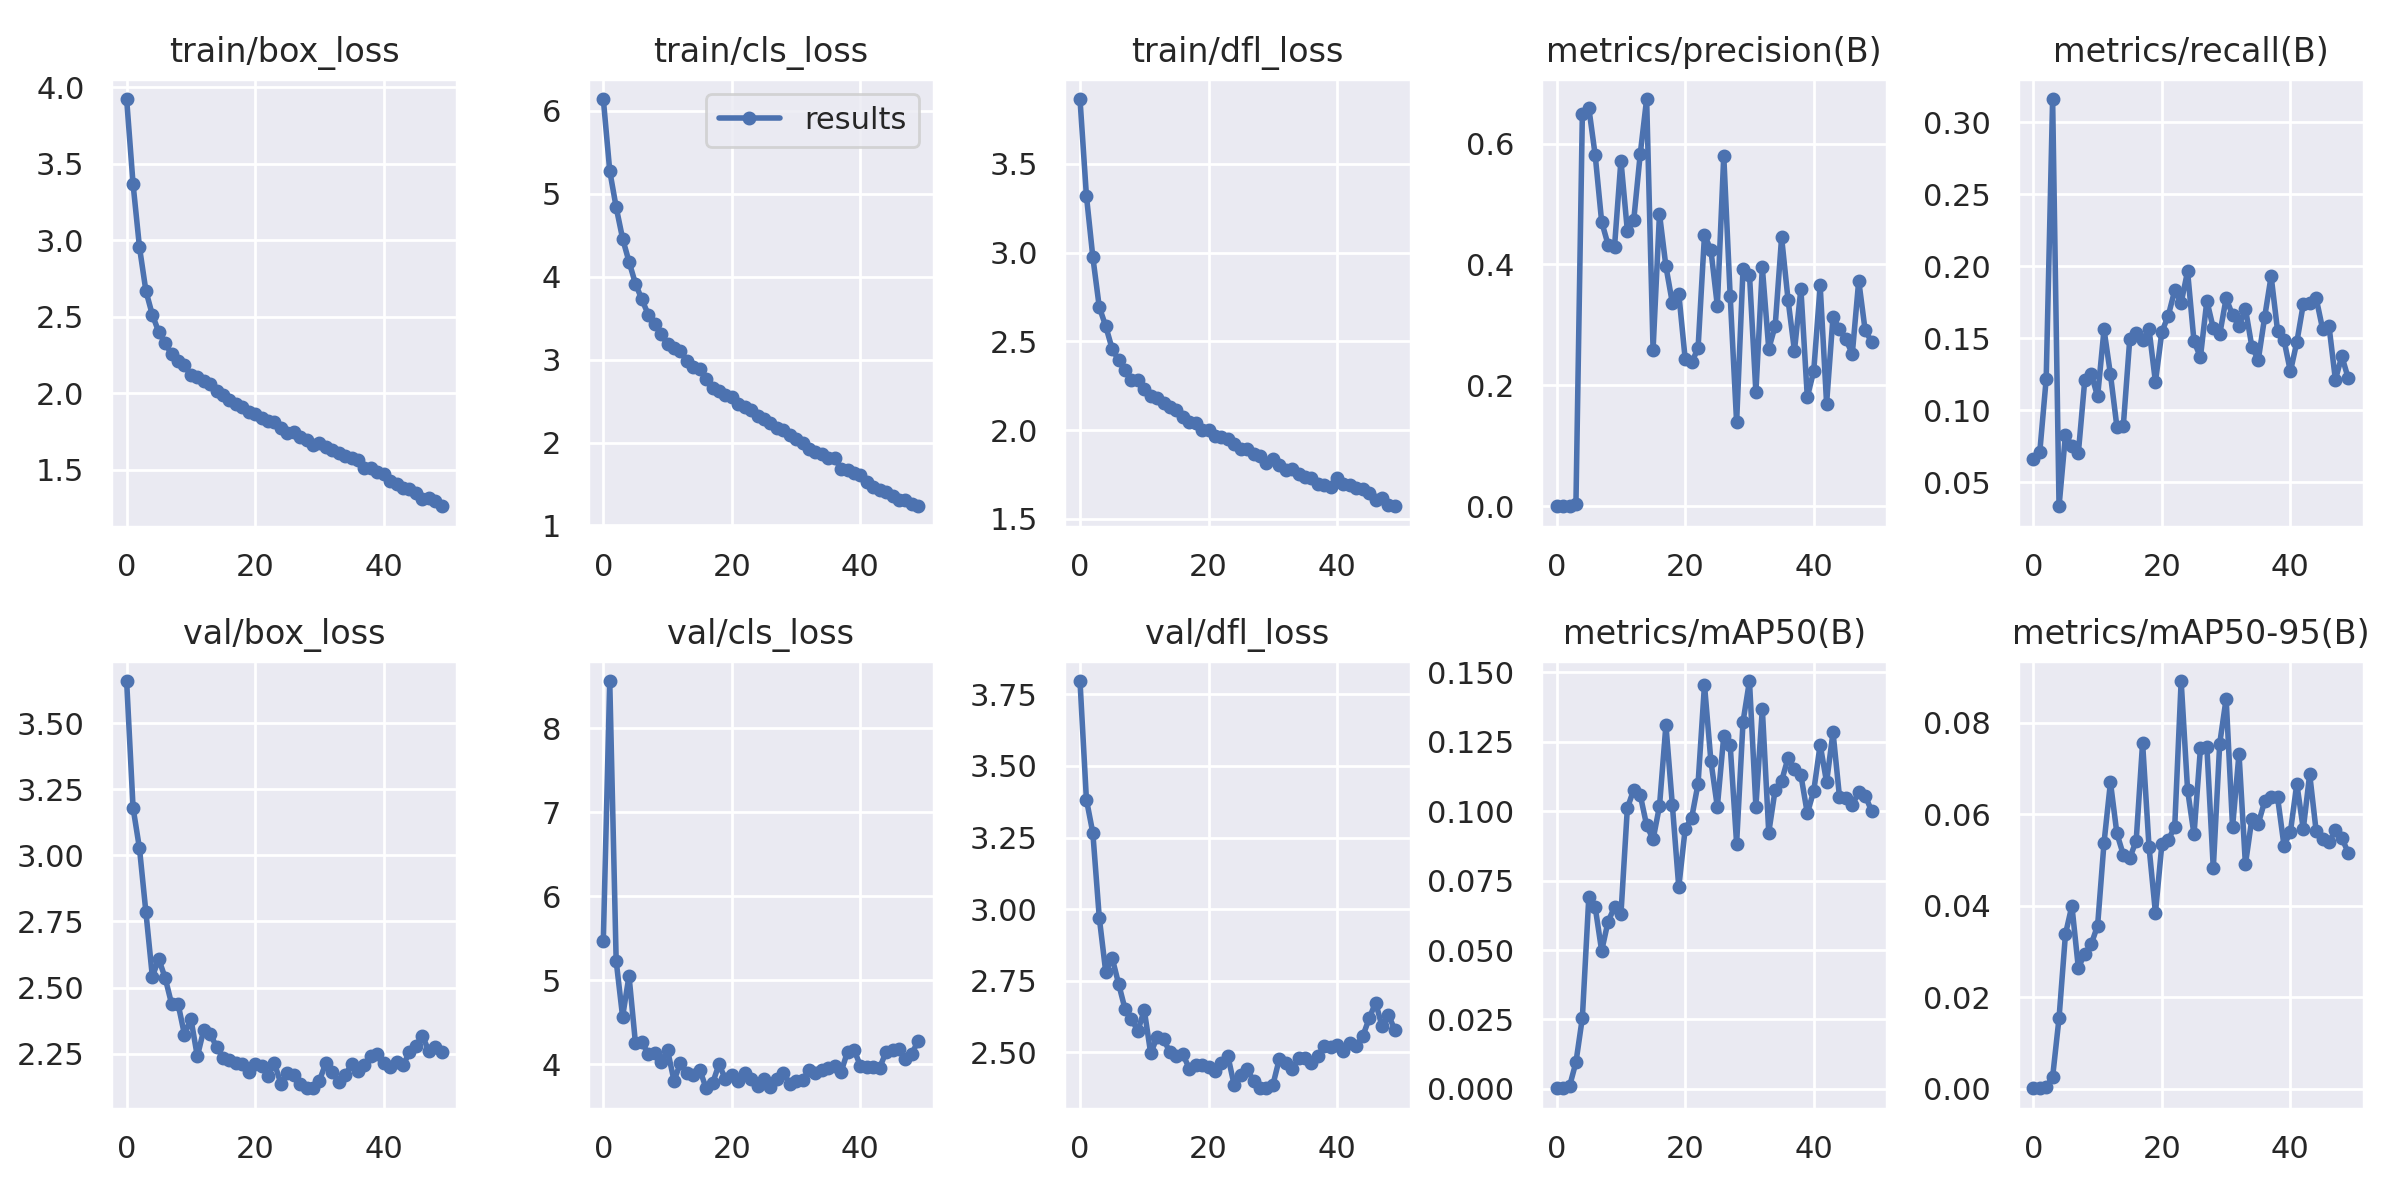

In [7]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


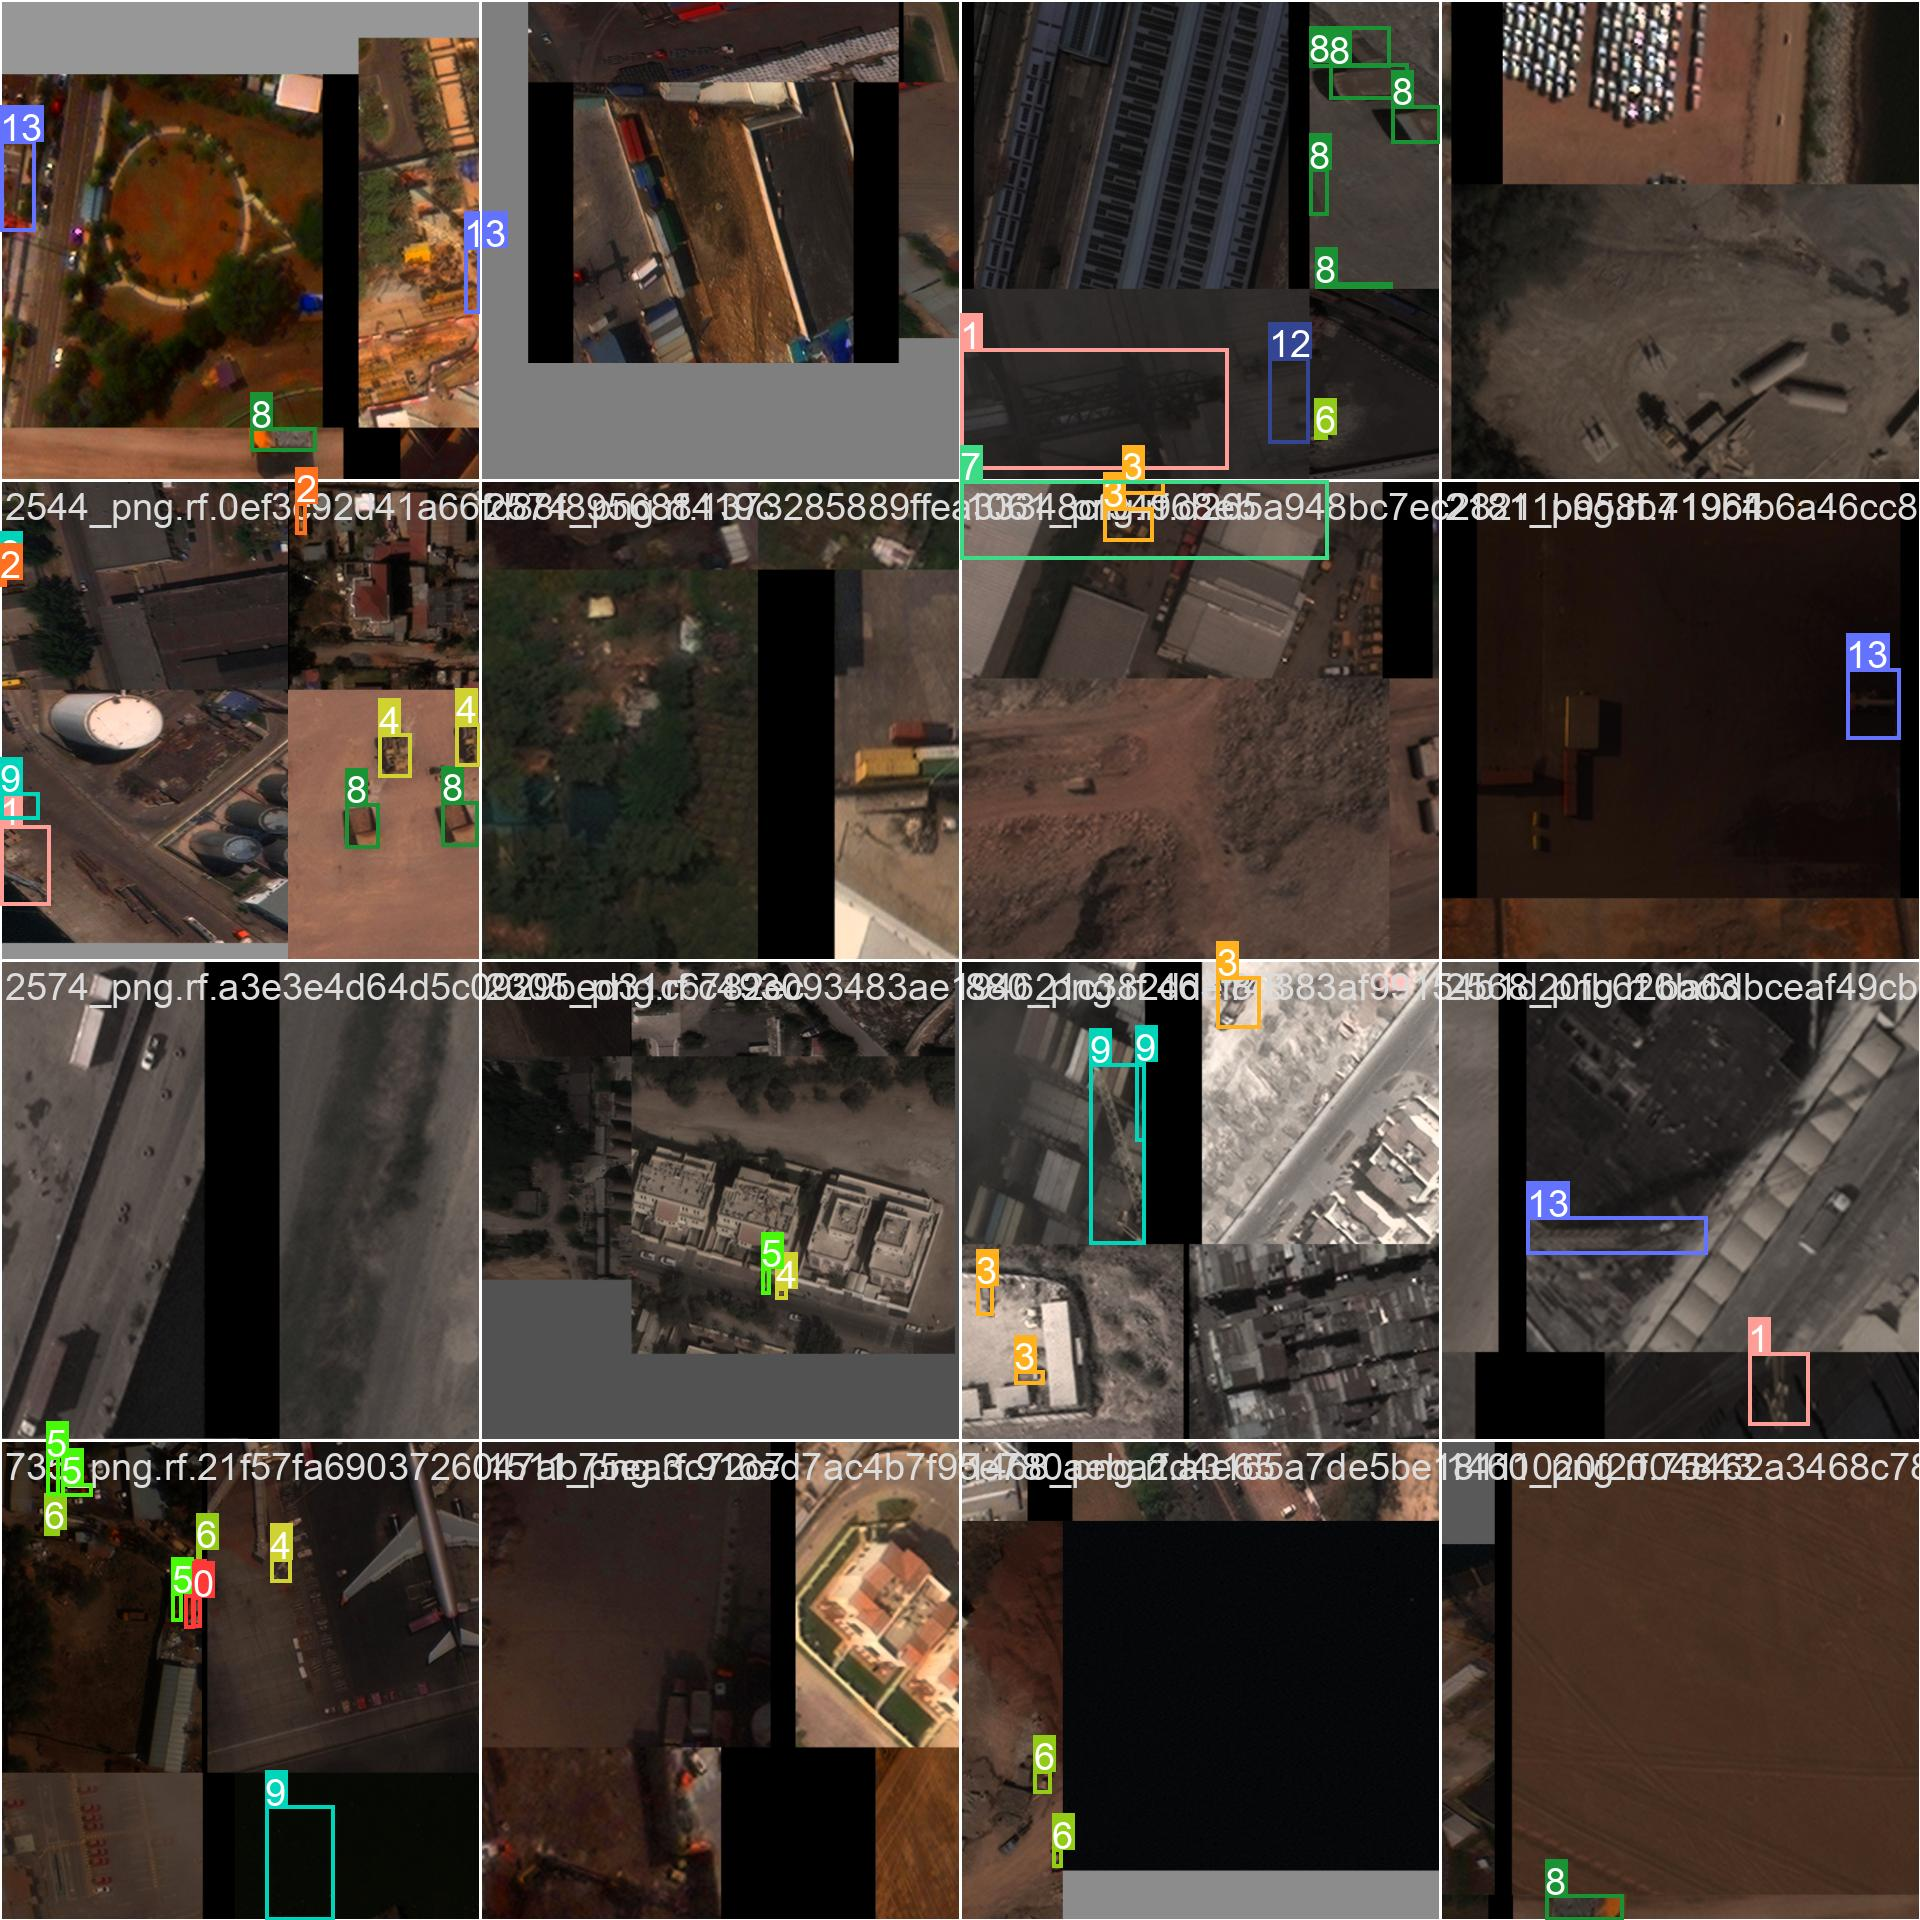

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/train_batch0.jpg', width=600)

In [10]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [11]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-08-15 03:59:03.226843: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv8_up1 summary (fused): 169 layers, 11131002 parameters, 0 gradients, 113.9 GFLOPs
image 1/163 /content/-NRMM-10/test/images/1063_png.rf.1e2fc921f5474735a2203f61ac9e673d.jpg: 576x640 120.6ms
image 2/163 /content/-NRMM-10/test/images/1063_png.rf.7f560f145dcee20d6054d3e3f551c7c2.jpg: 576x640 6.9ms
image 3/163 /content/-NRMM-10/test/images/118_png.rf.12d514584dca38b8e78236588313247d.jpg: 608x640 1 Dump Truck, 119.9ms
image 4/163 /content/-NRMM-10/test/images/118_png.rf.3ebee2b790e2513b4ee0b5ef8e05d11b.jpg: 608x640 6.9ms
image 5/163 /content/-NRMM-10/test/images/118_png.rf.a706752cc5905b61d6f12799edbb17be.jpg: 608x640 1 Excavator, 6.6ms
image 6/163 /content/-NRMM-10/test/images/118_png.rf.c5d3425b940b17ea220c073e1a871a87.jpg: 608x640 1 Excavator, 7.3ms
imag

In [12]:
# Let's say we want to create a directory named 'MyColabOutputs'
save_path = '/content/drive/My Drive/YOLOv8_up1'
if not os.path.exists(save_path):
    os.makedirs(save_path)

In [13]:
import shutil

# Source directory in Colab where your files are saved
src_dir_p = '/content/runs/detect/predict'

# List all files in your source directory
files = os.listdir(src_dir_p)

# Loop through and move each file to the destination directory on Google Drive
for file_name in files:
    full_file_name = os.path.join(src_dir_p, file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, save_path)

# Source directory in Colab where your files are saved
src_dir_v = '/content/runs/detect/val'

# List all files in your source directory
files = os.listdir(src_dir_v)

# Loop through and move each file to the destination directory on Google Drive
for file_name in files:
    full_file_name = os.path.join(src_dir_v, file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, save_path)

import shutil

# Source directory in Colab where your files are saved
src_dir_t = '/content/runs/detect/train'

# List all files in your source directory
files = os.listdir(src_dir_t)

# Loop through and move each file to the destination directory on Google Drive
for file_name in files:
    full_file_name = os.path.join(src_dir_t, file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, save_path)

In [14]:
#also the model
shutil.copy("/content/runs/detect/train/weights/best.pt", save_path)
shutil.copy("/content/runs/detect/train/weights/last.pt", save_path)

'/content/drive/My Drive/YOLOv8_up1/last.pt'

####B. using yolov8-p2


In [27]:
from ultralytics import YOLO

# Load a model
model = YOLO("/content/yolov8_p2.yaml")  # build a new model from scratch

# Use the model
model.train(data="/content/-NRMM-10/data.yaml", epochs=50, imgsz=640)  # train the model
metrics = model.val()  # evaluate model performance on the validation set


                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.Conv                  [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.C2f                   [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.Conv                  [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.C2f                   [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.Conv                  [256

/content


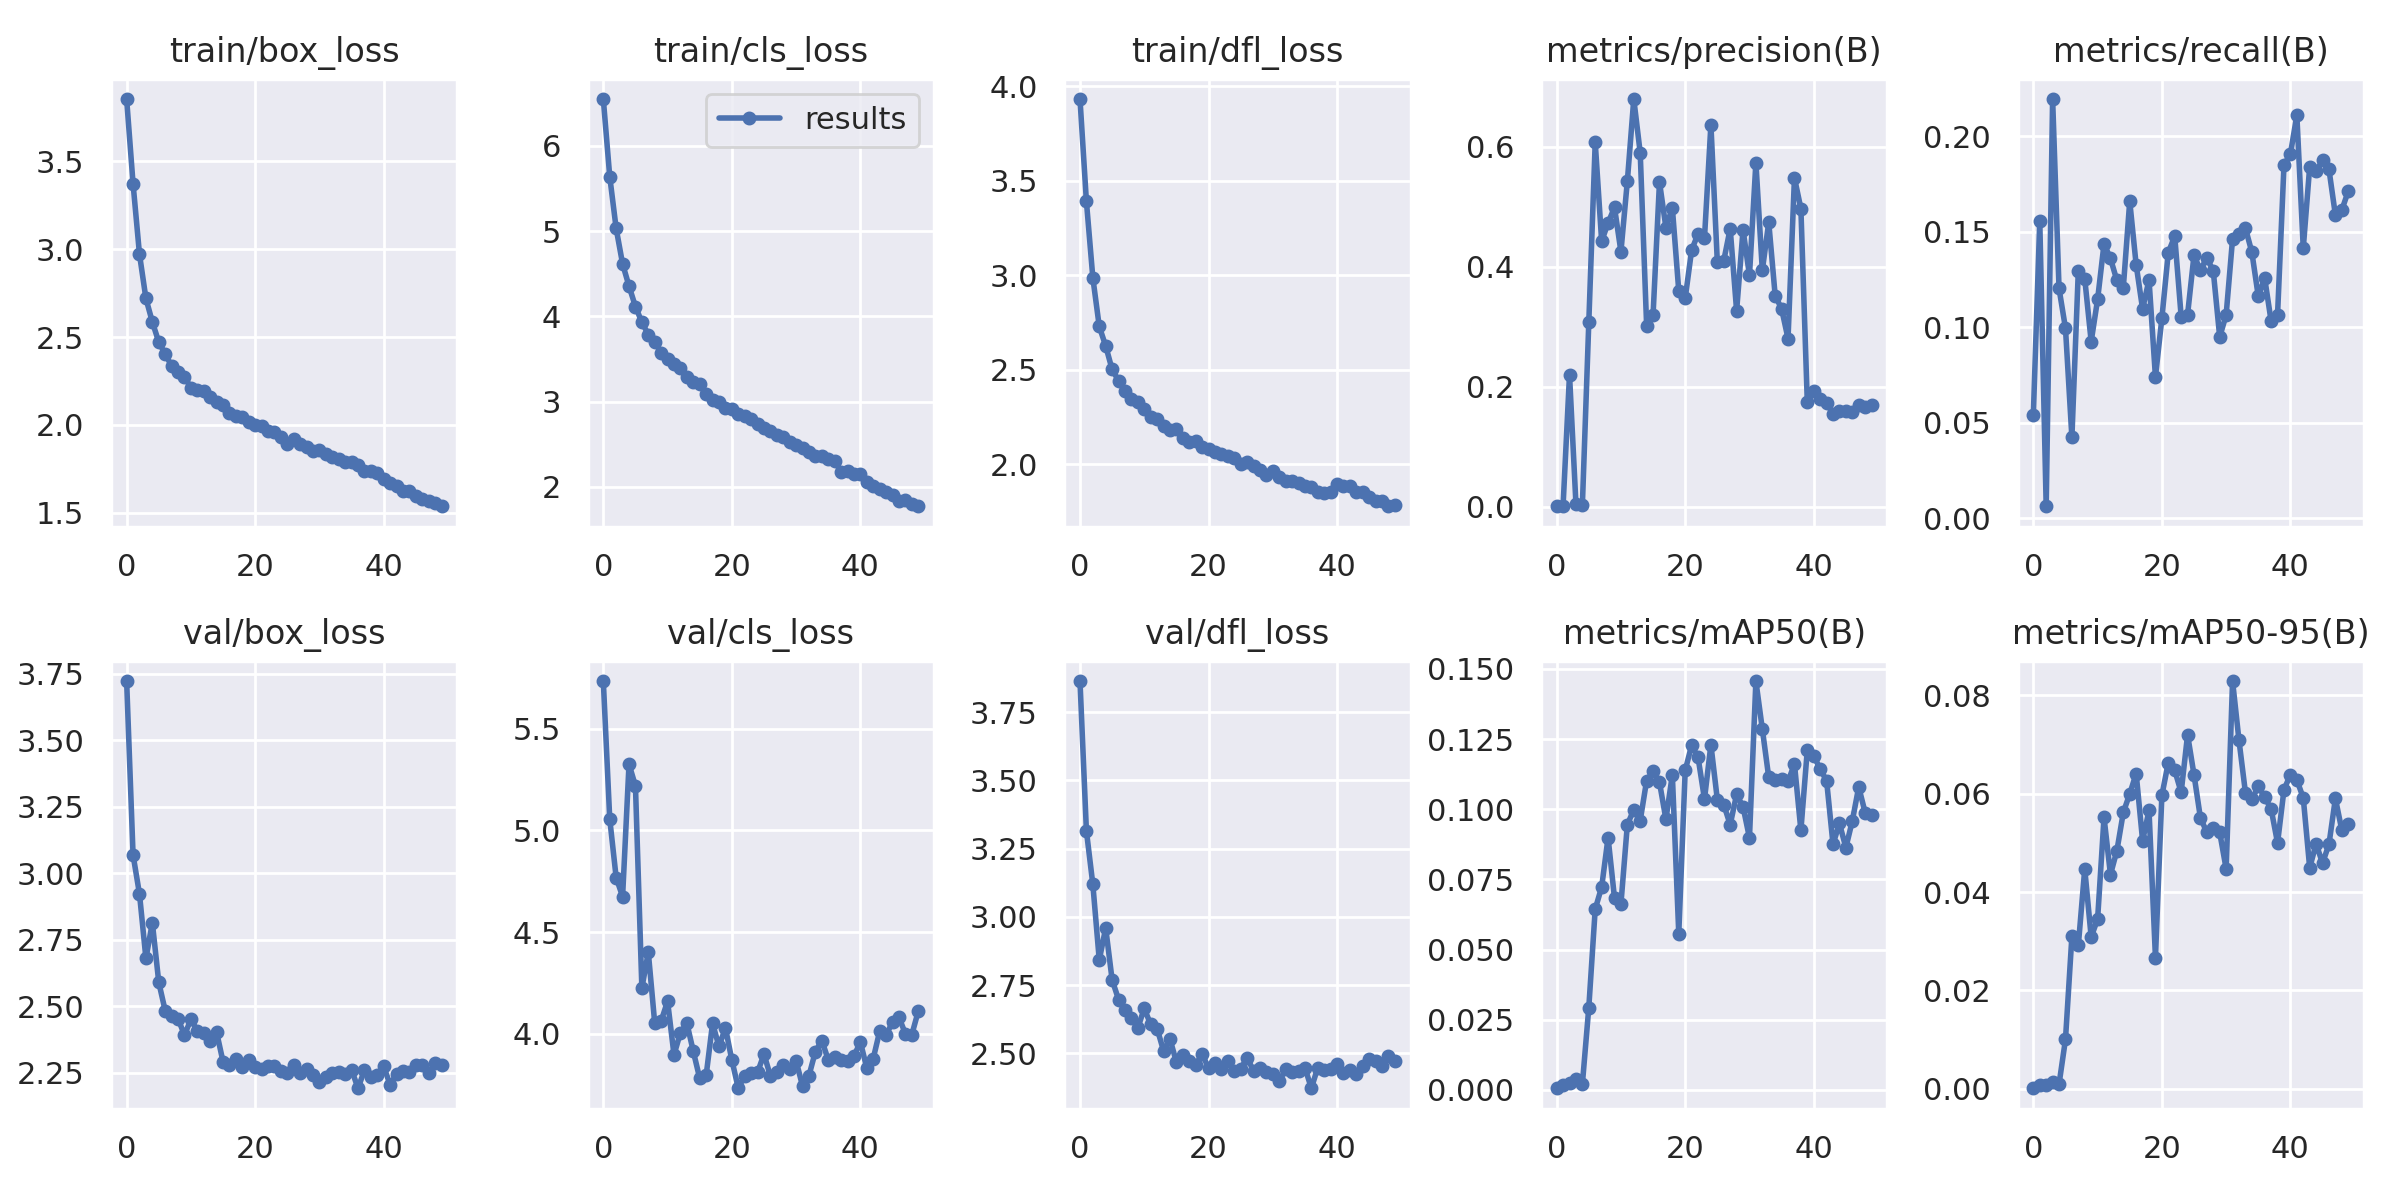

In [28]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

/content


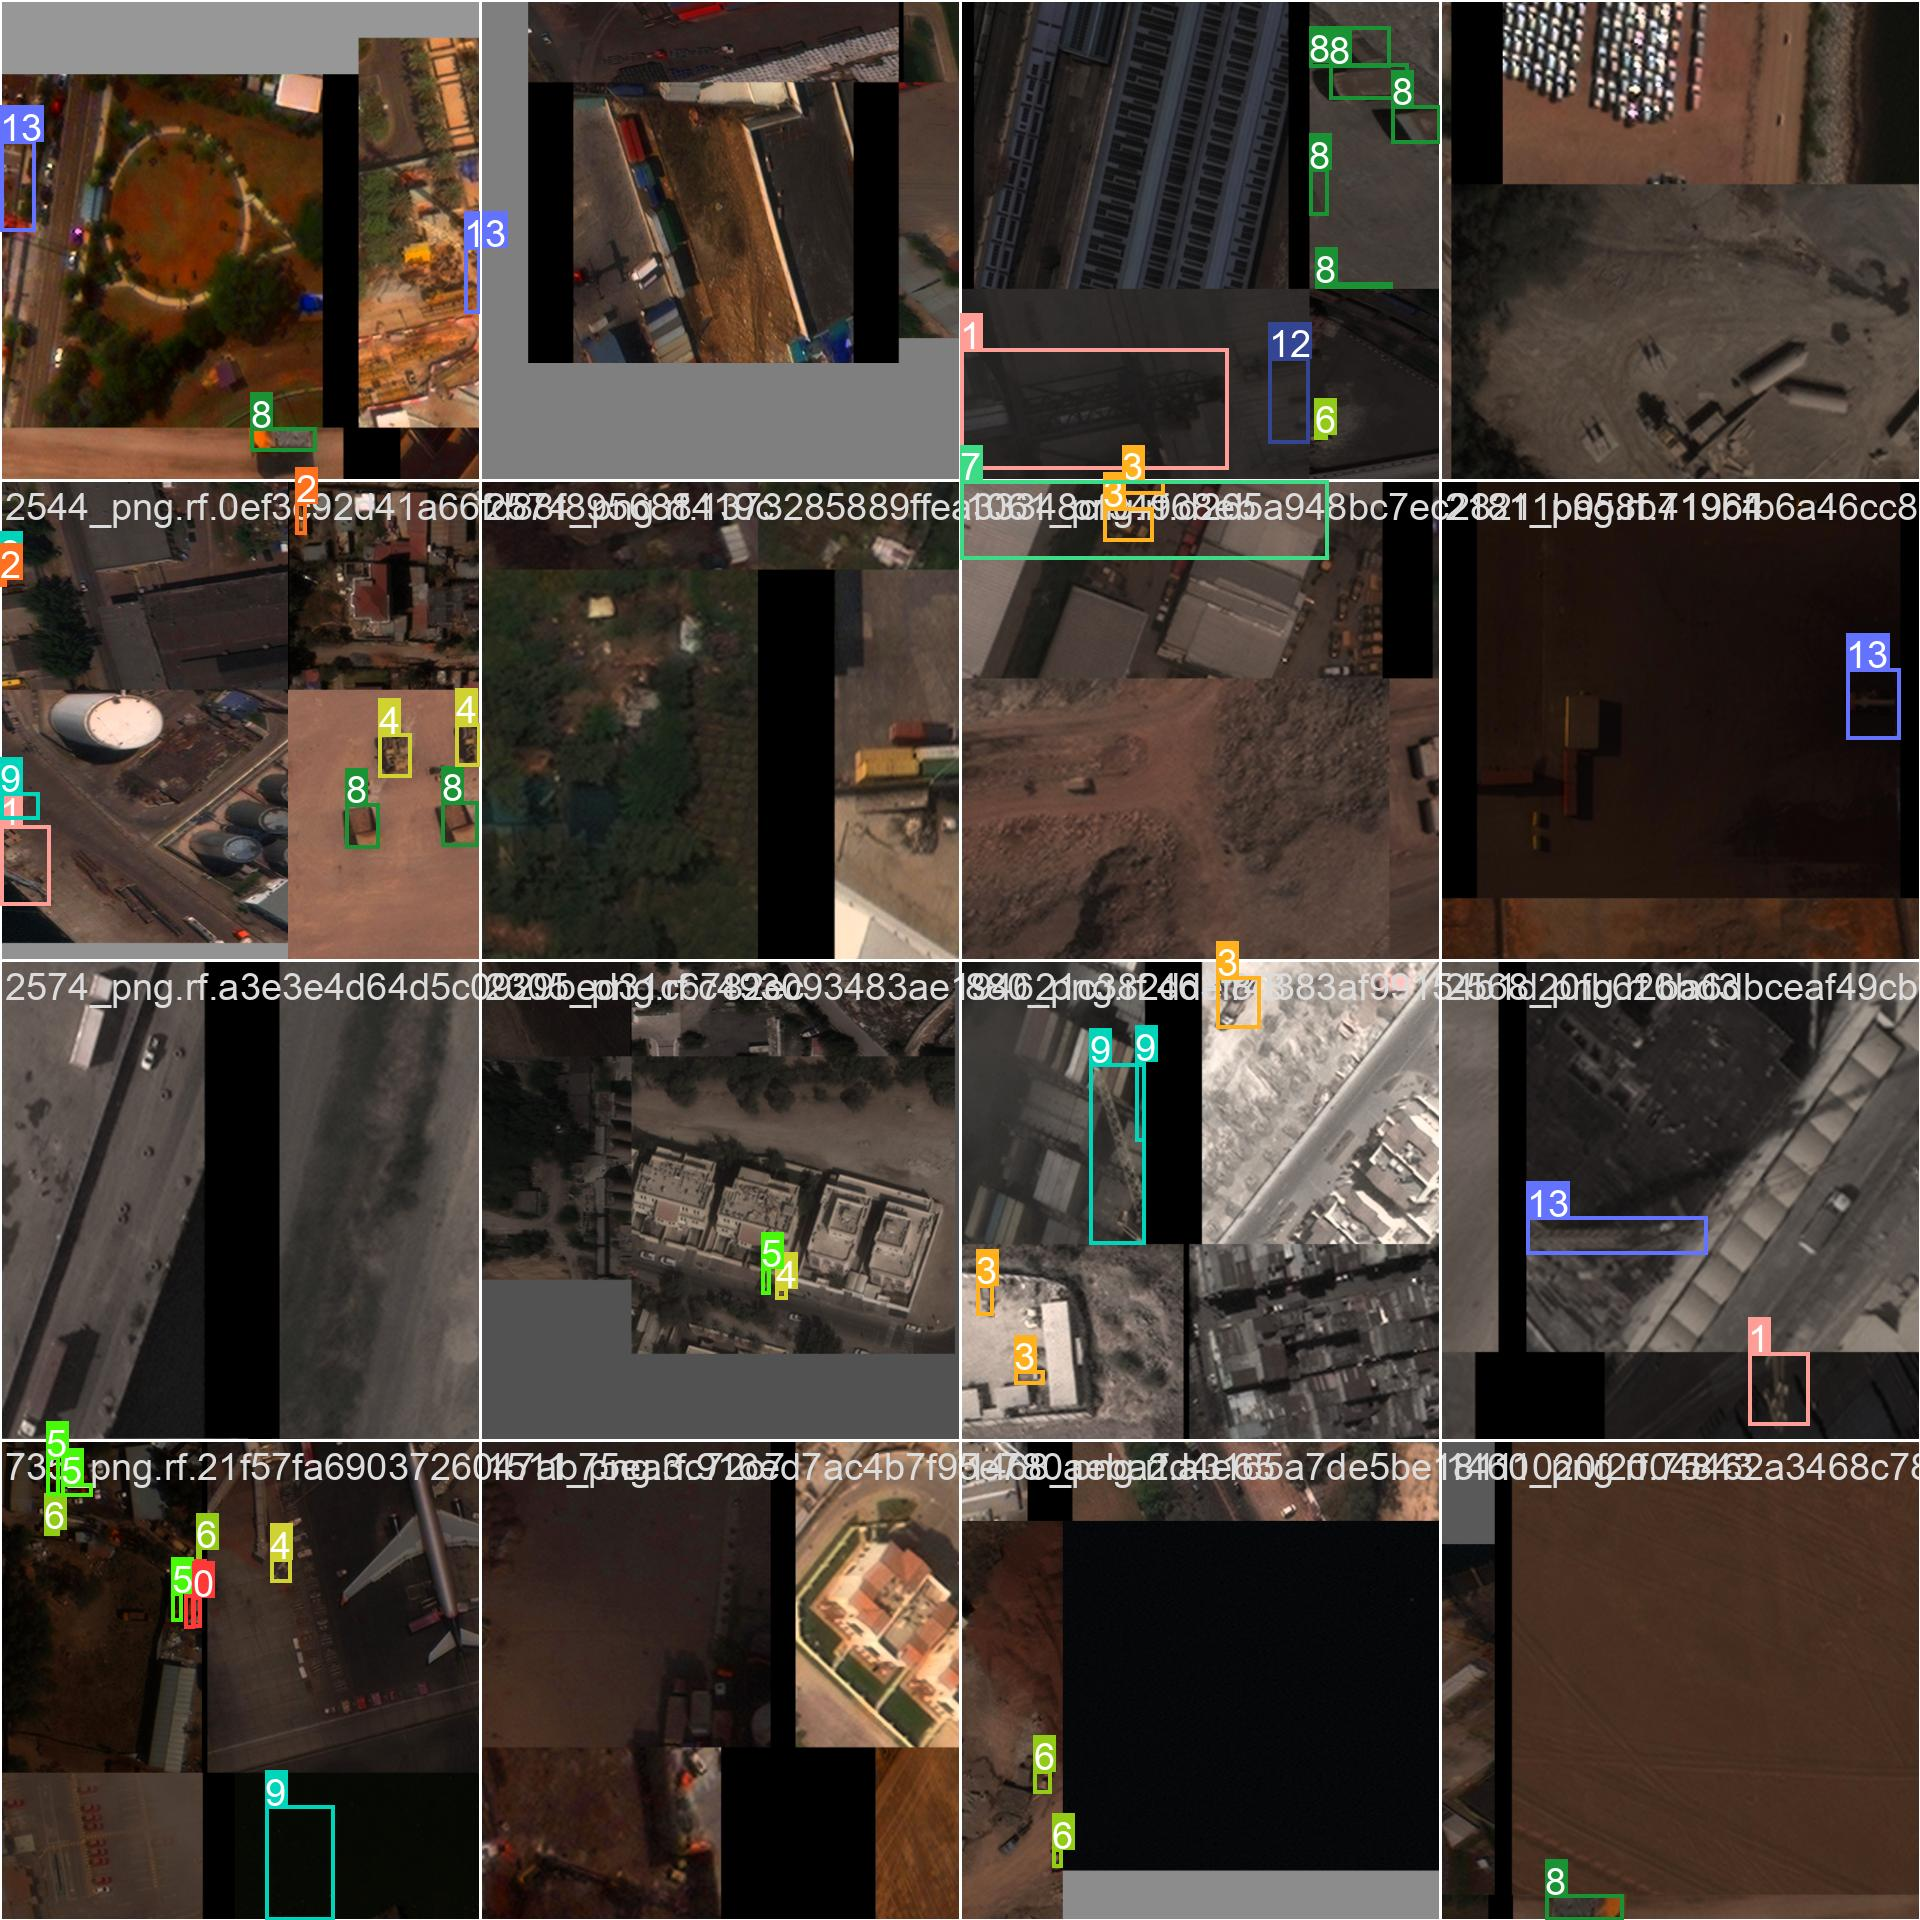

In [29]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/train_batch0.jpg', width=600)

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [30]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-08-15 05:57:41.739042: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv8_p2 summary (fused): 207 layers, 10630088 parameters, 0 gradients, 36.7 GFLOPs
image 1/163 /content/-NRMM-10/test/images/1063_png.rf.1e2fc921f5474735a2203f61ac9e673d.jpg: 576x640 122.7ms
image 2/163 /content/-NRMM-10/test/images/1063_png.rf.7f560f145dcee20d6054d3e3f551c7c2.jpg: 576x640 8.0ms
image 3/163 /content/-NRMM-10/test/images/118_png.rf.12d514584dca38b8e78236588313247d.jpg: 608x640 1 Dump Truck, 1 Front loader-Bulldozer, 124.6ms
image 4/163 /content/-NRMM-10/test/images/118_png.rf.3ebee2b790e2513b4ee0b5ef8e05d11b.jpg: 608x640 7.9ms
image 5/163 /content/-NRMM-10/test/images/118_png.rf.a706752cc5905b61d6f12799edbb17be.jpg: 608x640 8.1ms
image 6/163 /content/-NRMM-10/test/images/118_png.rf.c5d3425b940b17ea220c073e1a871a87.jpg: 608x640 1 Excavator,

In [31]:
# Let's say we want to create a directory named 'MyColabOutputs'
save_path = '/content/drive/My Drive/YOLOv8_p2'
if not os.path.exists(save_path):
    os.makedirs(save_path)

In [32]:
import shutil

# Source directory in Colab where your files are saved
src_dir_p = '/content/runs/detect/predict2'

# List all files in your source directory
files = os.listdir(src_dir_p)

# Loop through and move each file to the destination directory on Google Drive
for file_name in files:
    full_file_name = os.path.join(src_dir_p, file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, save_path)

# Source directory in Colab where your files are saved
src_dir_v = '/content/runs/detect/val2'

# List all files in your source directory
files = os.listdir(src_dir_v)

# Loop through and move each file to the destination directory on Google Drive
for file_name in files:
    full_file_name = os.path.join(src_dir_v, file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, save_path)

import shutil

# Source directory in Colab where your files are saved
src_dir_t = '/content/runs/detect/train2'

# List all files in your source directory
files = os.listdir(src_dir_t)

# Loop through and move each file to the destination directory on Google Drive
for file_name in files:
    full_file_name = os.path.join(src_dir_t, file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, save_path)

In [33]:
#also the model
shutil.copy("/content/runs/detect/train2/weights/best.pt", save_path)
shutil.copy("/content/runs/detect/train2/weights/last.pt", save_path)

'/content/drive/My Drive/YOLOv8_p2/last.pt'

####C. up1&p2

In [40]:
from ultralytics import YOLO

# Load a model
model = YOLO("/content/yolov8_p2&up1.yaml")  # build a new model from scratch

# Use the model
model.train(data="/content/-NRMM-10/data.yaml", epochs=50, imgsz=640)  # train the model
metrics = model.val()  # evaluate model performance on the validation set


                   from  n    params  module                                       arguments                     
  0                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
  1                  -1  1       928  ultralytics.nn.modules.Conv                  [3, 32, 3, 2]                 
  2                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  3                  -1  1     29056  ultralytics.nn.modules.C2f                   [64, 64, 1, True]             
  4                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  5                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  6                  -1  1    295424  ultralytics.nn.modules.Conv                  [128, 256, 3, 2]              
  7                  -1  2    788480  ultralytics.nn.modules.C2f                   [256

/content


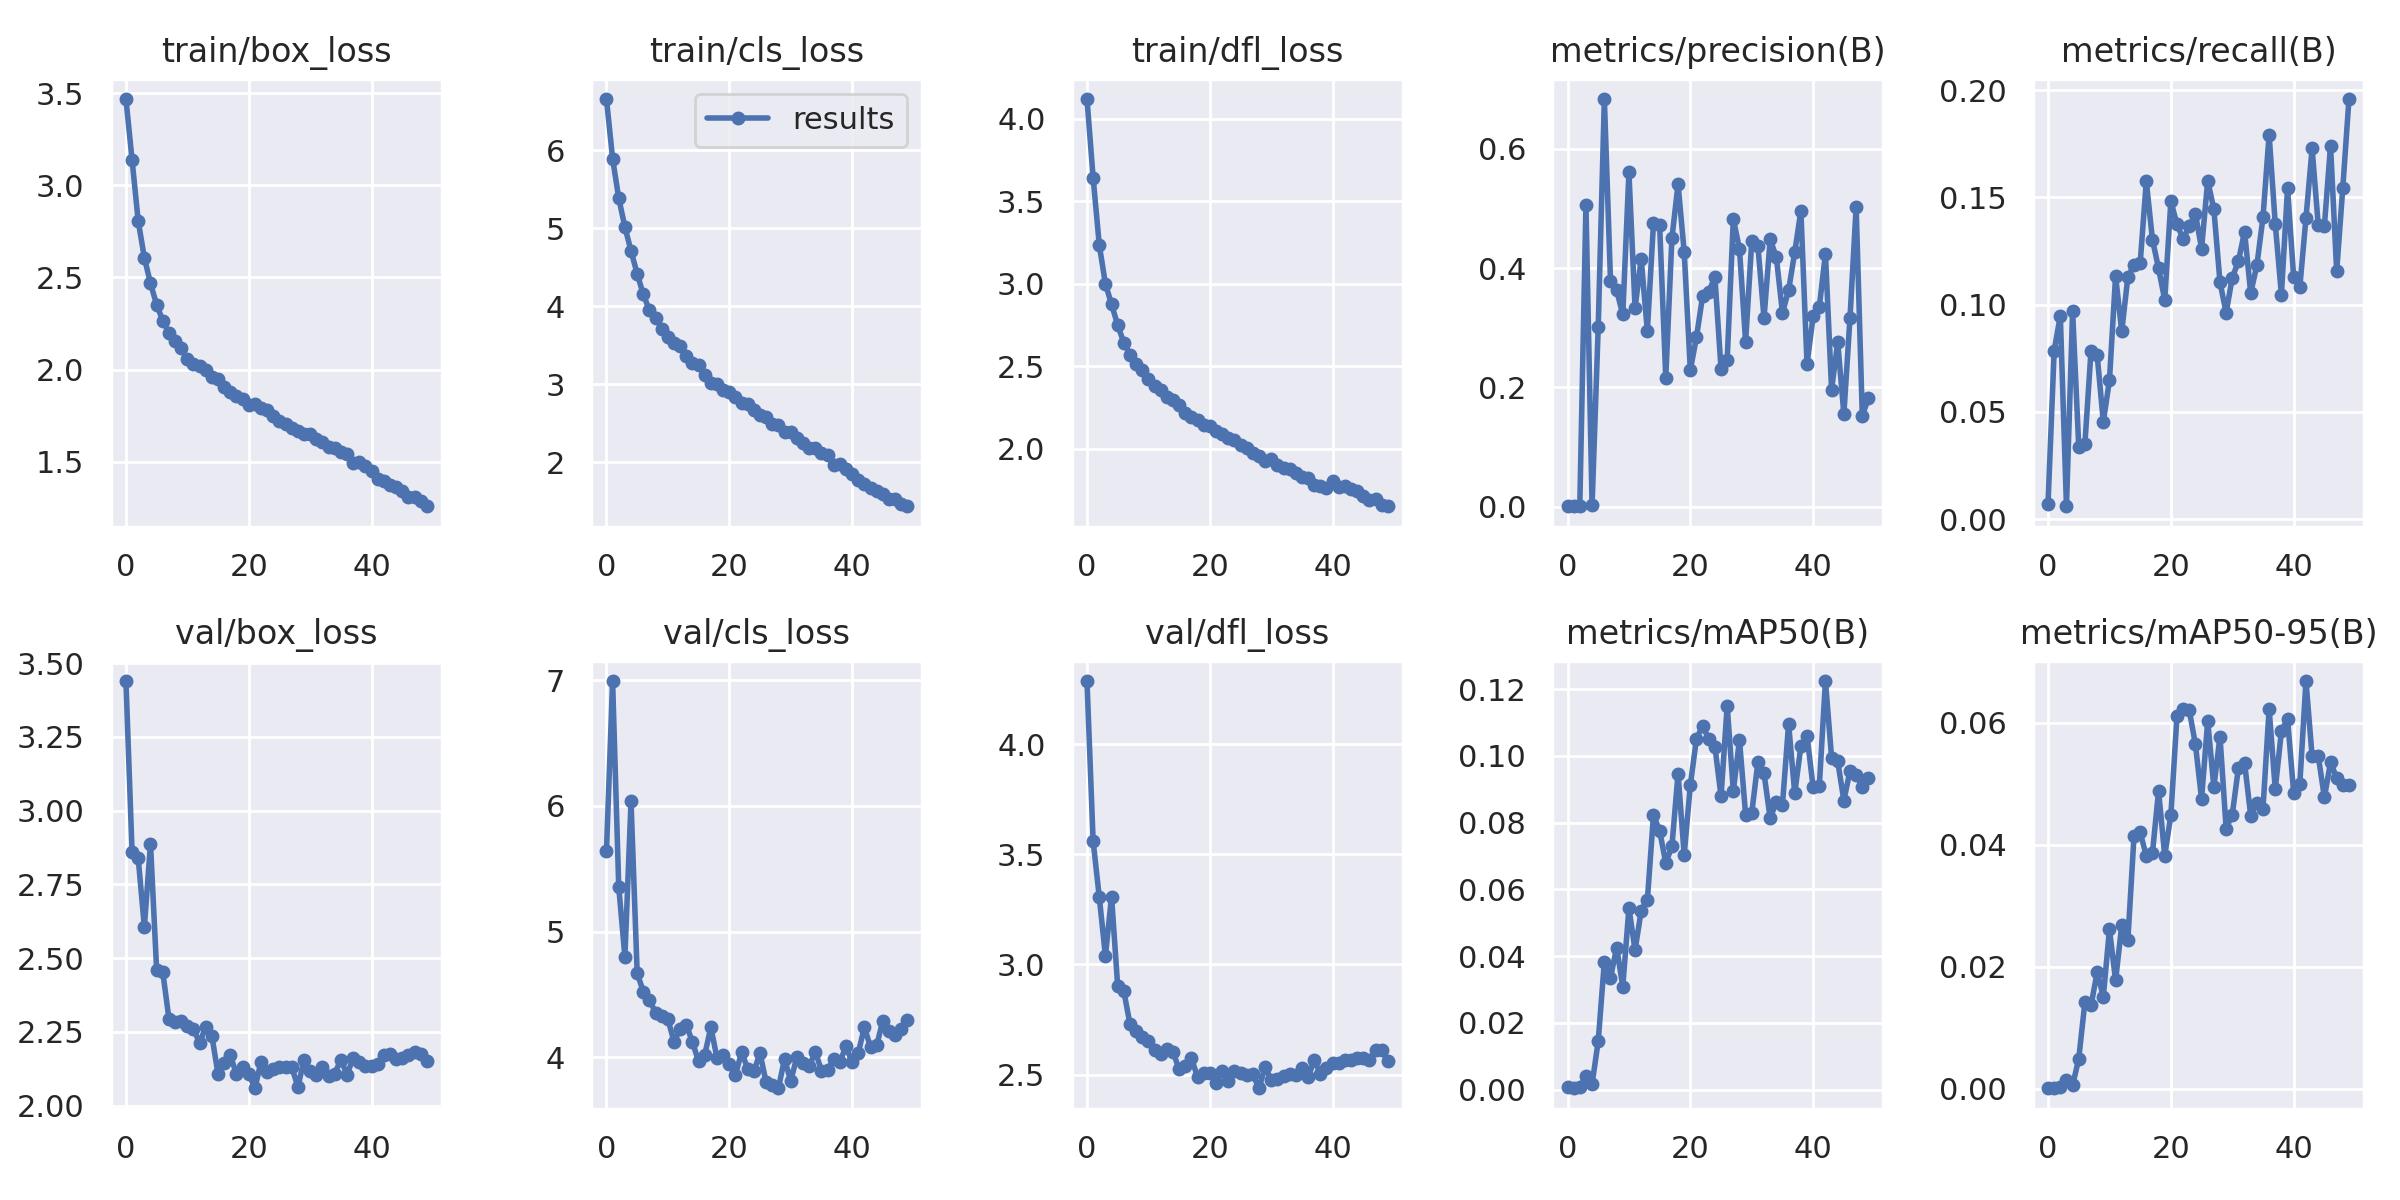

In [41]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/results.png', width=600)

/content


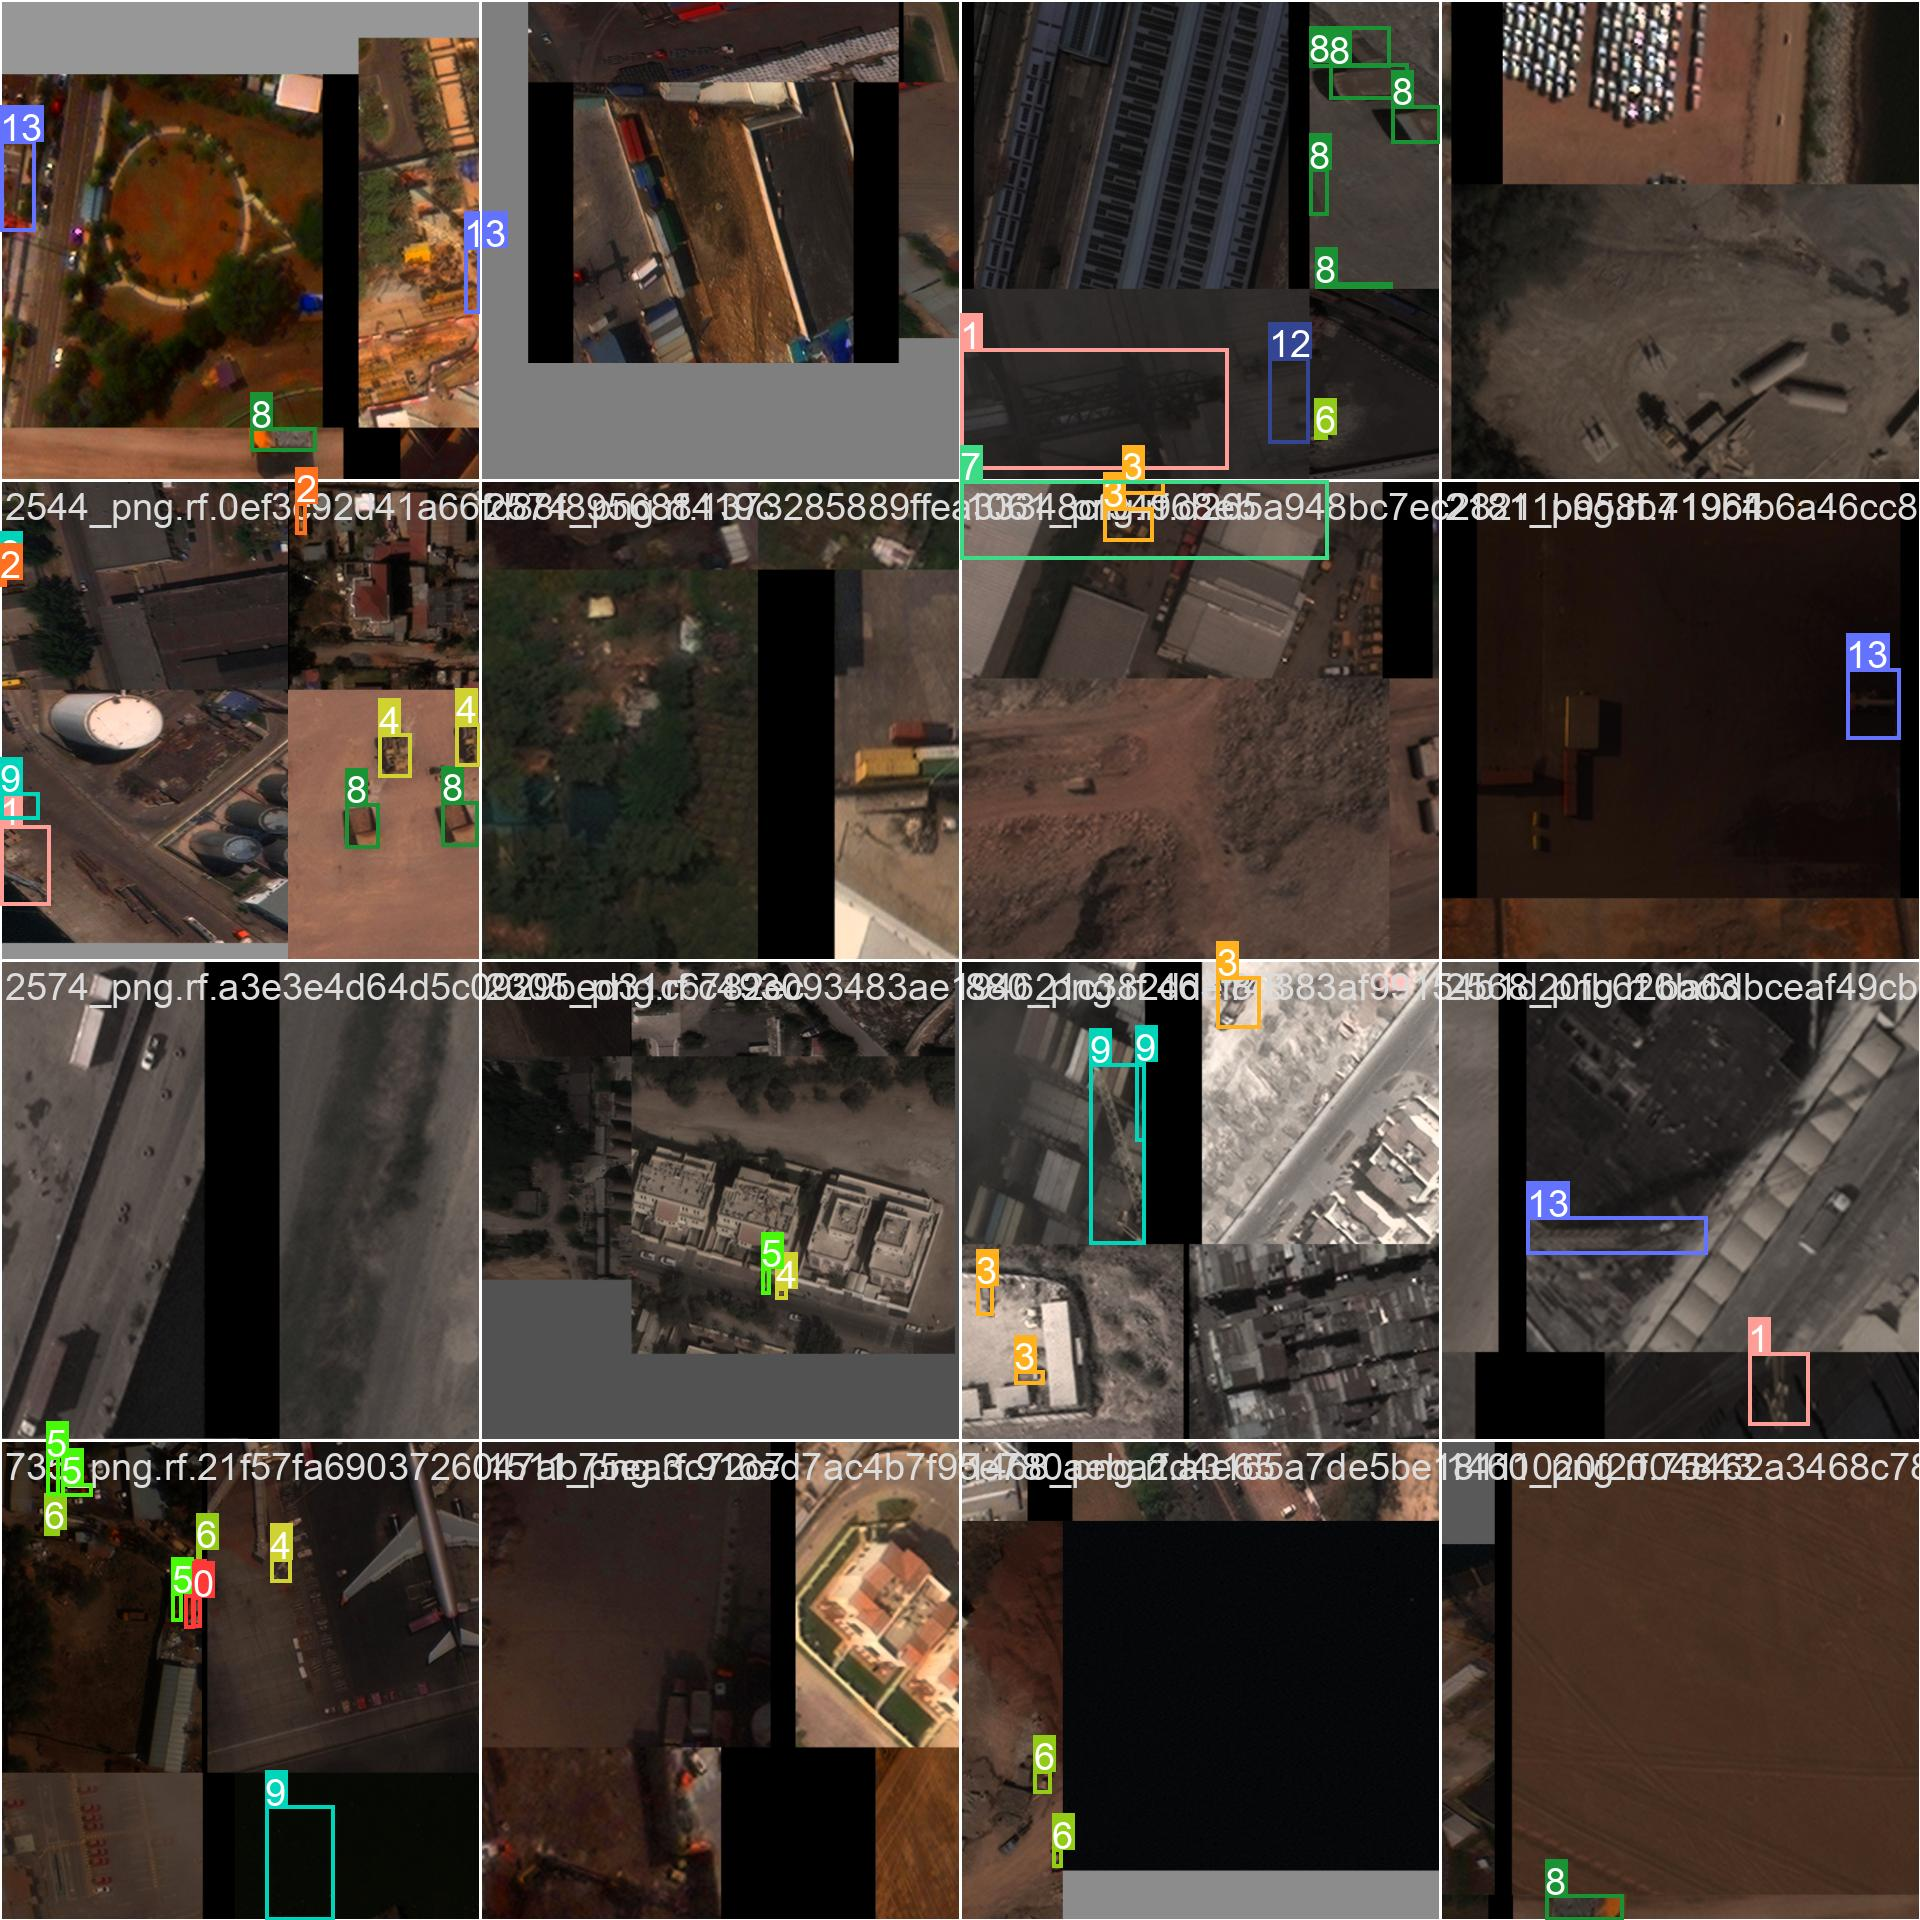

In [42]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/train_batch0.jpg', width=600)

In [43]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-08-15 08:07:57.801435: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv8_p2&up1 summary (fused): 208 layers, 10630088 parameters, 0 gradients, 146.8 GFLOPs
image 1/163 /content/-NRMM-10/test/images/1063_png.rf.1e2fc921f5474735a2203f61ac9e673d.jpg: 576x640 123.6ms
image 2/163 /content/-NRMM-10/test/images/1063_png.rf.7f560f145dcee20d6054d3e3f551c7c2.jpg: 576x640 8.0ms
image 3/163 /content/-NRMM-10/test/images/118_png.rf.12d514584dca38b8e78236588313247d.jpg: 608x640 1 Dump Truck, 121.8ms
image 4/163 /content/-NRMM-10/test/images/118_png.rf.3ebee2b790e2513b4ee0b5ef8e05d11b.jpg: 608x640 8.2ms
image 5/163 /content/-NRMM-10/test/images/118_png.rf.a706752cc5905b61d6f12799edbb17be.jpg: 608x640 8.0ms
image 6/163 /content/-NRMM-10/test/images/118_png.rf.c5d3425b940b17ea220c073e1a871a87.jpg: 608x640 1 Crane Truck, 2 Excavators, 8.0m

In [44]:
# Let's say we want to create a directory named 'MyColabOutputs'
save_path = '/content/drive/My Drive/YOLOv8_p2&up1'
if not os.path.exists(save_path):
    os.makedirs(save_path)

In [45]:
import shutil

# Source directory in Colab where your files are saved
src_dir_p = '/content/runs/detect/predict3'

# List all files in your source directory
files = os.listdir(src_dir_p)

# Loop through and move each file to the destination directory on Google Drive
for file_name in files:
    full_file_name = os.path.join(src_dir_p, file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, save_path)

# Source directory in Colab where your files are saved
src_dir_v = '/content/runs/detect/val3'

# List all files in your source directory
files = os.listdir(src_dir_v)

# Loop through and move each file to the destination directory on Google Drive
for file_name in files:
    full_file_name = os.path.join(src_dir_v, file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, save_path)

import shutil

# Source directory in Colab where your files are saved
src_dir_t = '/content/runs/detect/train3'

# List all files in your source directory
files = os.listdir(src_dir_t)

# Loop through and move each file to the destination directory on Google Drive
for file_name in files:
    full_file_name = os.path.join(src_dir_t, file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, save_path)

In [46]:
#also the model
shutil.copy("/content/runs/detect/train3/weights/best.pt", save_path)
shutil.copy("/content/runs/detect/train3/weights/last.pt", save_path)

'/content/drive/My Drive/YOLOv8_p2&up1/last.pt'